In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
import librosa
import librosa.display

In [4]:
path_to_audio = 'corpus/audio/'

In [15]:
# test feature extraction for 1 audio clip
x, sr = librosa.load(path_to_audio+'a001_0_10.wav', sr=None)

In [17]:
print(x.shape)
print(sr)

(441001,)
44100


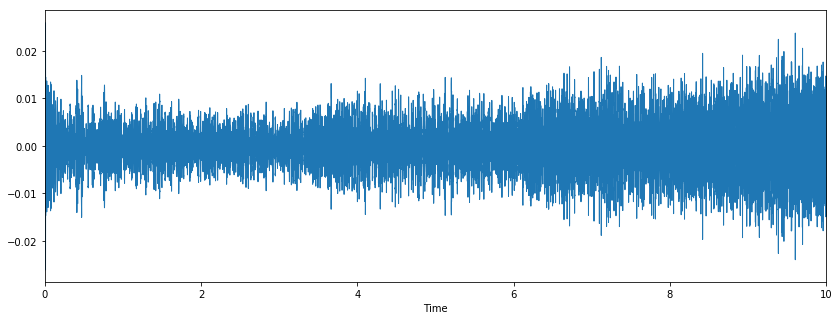

In [19]:
plt.figure(figsize=(14,5))
librosa.display.waveplot(x, sr=sr)

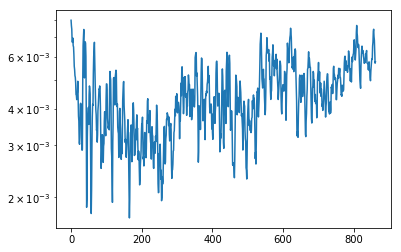

In [23]:
rmse = librosa.feature.rmse(y=x, )
plt.semilogy(rmse.T)

In [28]:
zcr = librosa.feature.zero_crossing_rate(x)

In [31]:
spec_centroid = librosa.feature.spectral_centroid(x, sr=sr)

In [34]:
rolloff = librosa.feature.spectral_rolloff(x, sr=sr)

In [37]:
spec_flux = librosa.onset.onset_strength(x, sr=sr)

In [41]:
frames = np.arange(len(spec_flux))
t = librosa.frames_to_time(frames, sr=sr)

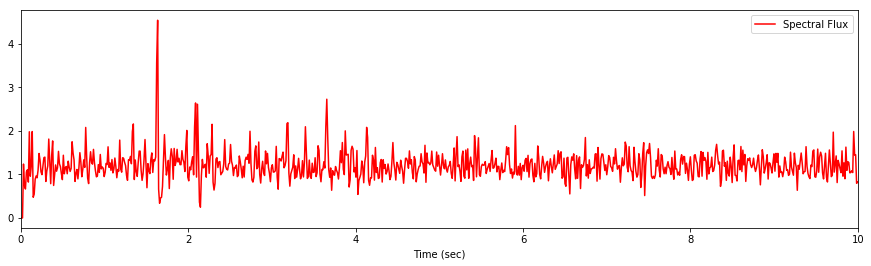

In [42]:
plt.figure(figsize=(15, 4))
plt.plot(t, spec_flux, 'r-')
plt.xlim(0, t.max())
plt.xlabel('Time (sec)')
plt.legend(('Spectral Flux',))

In [43]:
mfcc = librosa.feature.mfcc(x, sr=sr)

In [44]:
mfcc.shape

(20, 862)

In [47]:
print(rmse.mean(), rmse.std())

0.004428698 0.0011927865


In [49]:
print(zcr.mean(), zcr.std())

0.02578997335411833 0.016590533063691064


In [50]:
print(spec_centroid.mean(), spec_centroid.std())
print(rolloff.mean(), rolloff.std())
print(spec_flux.mean(), spec_flux.std())

1589.928013881851 348.53997525499483
3105.2527620178366 799.0657714926456
1.210983707043314 0.32818882808432


In [53]:
mfcc_mean = [mfcc[i].mean() for i in range(len(mfcc))]
mfcc_std = [mfcc[i].std() for i in range(len(mfcc))]

In [94]:
def extract_features(audio_file, label):
    y, sr = librosa.load('corpus/'+audio_file, sr=None)
    rmse = librosa.feature.rmse(y=y)
    zcr = librosa.feature.zero_crossing_rate(y=y)
    spec_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    spec_flux = librosa.onset.onset_strength(y=y, sr=sr)
    mfcc = librosa.feature.mfcc(y=y,sr=sr)
    feature_dict = {}
    feature_dict['rmse_mean'] = rmse.mean()
    feature_dict['rmse_std'] = rmse.std()
    feature_dict['zcr_mean'] = zcr.mean()
    feature_dict['zcr_std'] = zcr.std()
    feature_dict['spec_centoid_mean'] = spec_centroid.mean()
    feature_dict['spec_centoid_std'] = spec_centroid.std()
    feature_dict['rolloff_mean'] = rolloff.mean()
    feature_dict['rolloff_std'] = rolloff.std()
    feature_dict['spec_flux_mean'] = spec_flux.mean()
    feature_dict['spec_flux_std'] = spec_flux.std()
    for i in range(len(mfcc)):
        mean = 'mfcc_{0:02d}_mean'.format(i+1)
        std = 'mfcc_{0:02d}_std'.format(i+1)
        feature_dict[mean] = mfcc[i].mean()
        feature_dict[std] = mfcc[i].std()
    feature_dict['label'] = loc_int_map[label]
    return feature_dict

In [59]:
with open('corpus/meta.txt') as f:
    flines = f.readlines()

In [73]:
afs, labels, _ = zip(*[line.rstrip('\n').split('\t') for line in flines])

In [74]:
afs[:10]

('audio/b020_90_100.wav',
 'audio/b020_110_120.wav',
 'audio/b020_100_110.wav',
 'audio/b020_40_50.wav',
 'audio/b020_50_60.wav',
 'audio/b020_30_40.wav',
 'audio/b020_160_170.wav',
 'audio/b020_170_180.wav',
 'audio/b020_150_160.wav',
 'audio/b020_60_70.wav')

In [93]:
locs = set(labels)
loc_int_map = {loc:i+1 for i,loc in enumerate(list(locs))}
loc_int_map

{'beach': 14,
 'bus': 11,
 'cafe/restaurant': 7,
 'car': 2,
 'city_center': 3,
 'forest_path': 6,
 'grocery_store': 1,
 'home': 8,
 'library': 12,
 'metro_station': 13,
 'office': 15,
 'park': 9,
 'residential_area': 4,
 'train': 5,
 'tram': 10}

In [99]:
%%time
X = [extract_features(af, label) for af,label in zip(afs, labels)]

Wall time: 27min 24s


In [101]:
import pandas as pd

In [103]:
X_pd = pd.DataFrame(X)

In [104]:
X_pd.head()

,label,mfcc_01_mean,mfcc_01_std,mfcc_02_mean,mfcc_02_std,mfcc_03_mean,mfcc_03_std,mfcc_04_mean,mfcc_04_std,mfcc_05_mean,...,rmse_mean,rmse_std,rolloff_mean,rolloff_std,spec_centoid_mean,spec_centoid_std,spec_flux_mean,spec_flux_std,zcr_mean,zcr_std
0,14,-431.829531,31.289929,135.895387,8.809357,-53.725513,5.927891,24.895814,5.725864,-3.183241,...,0.003790,0.000803,5579.098051,346.033500,3120.416928,302.216856,1.249412,0.333877,0.082505,0.019671
1,14,-436.539917,26.518017,144.580086,10.041389,-50.765986,6.809961,23.333789,6.239996,-0.538261,...,0.005367,0.002189,5121.480013,532.699615,2677.467822,423.000073,1.254992,0.343668,0.056097,0.022570
2,14,-434.430916,24.856232,137.971707,9.206689,-53.072679,6.447099,24.839483,5.899629,-2.037454,...,0.004325,0.001139,5450.023734,399.612084,2972.668779,329.724678,1.257049,0.339699,0.069154,0.020514
3,14,-429.411378,29.635465,130.319024,9.218251,-53.530134,5.817122,25.646563,6.147800,-3.226847,...,0.003940,0.001392,5783.338734,405.385235,3230.235048,301.789578,1.271621,0.412785,0.085348,0.019375
4,14,-438.519412,31.680932,129.181425,8.782248,-58.355813,6.728568,25.899696,6.163876,-4.961766,...,0.003133,0.000929,5841.843097,325.315548,3342.164413,236.548179,1.270838,0.386981,0.099330,0.013661


In [106]:
# save to disk
X_pd.to_pickle("audio_features.pkl")